# 1. Decision Trees

## Decision Tree Building Process

### 1. Calculate the Entropy of the Target Variable for the Entire Dataset:
Entropy is like a measure of how mixed up or uncertain our target variable is. If all the outcomes are the same, the entropy is low; if they're all mixed up, the entropy is high.

**Example:** Imagine we're predicting whether it will rain or not (binary: yes or no). If all our days are sunny, the entropy is low. If half are sunny and half rainy, the entropy is high.

### 2. For Each Feature in the Dataset:

#### a. Calculate the Information Gain of the Feature with Respect to the Target Variable:
Information gain helps us pick the best feature to split our data. It measures how much more organized our predictions become if we split based on a particular feature.

**Example:** If we have a "temperature" feature, we might ask: "If we split the data based on high and low temperatures, does it help us make more accurate predictions about rain or sunshine?"

### 3. Select the Feature with the Highest Information Gain:

Pick the feature that gives us the most organized and clear information about our target variable. This is the feature that, when used to split the data, reduces the uncertainty the most.

**Example:** If "temperature" gives us the most clarity about predicting rain or sunshine, we choose it.

### 4. Split the Data on the Selected Feature:

Divide our data into subsets based on the chosen feature. Each subset is like a group with similar characteristics according to that feature.

**Example:** Split the data into days with high temperatures and days with low temperatures.

### 5. Repeat the Process Recursively on Each Subset of the Data Until a Stopping Criterion is Met:

For each subset, repeat the entire process. Pick the best feature, split the data, and keep going until we meet a condition to stop (like a certain depth of the tree or a minimum number of samples).

### 6. Assign a Class Label or a Prediction Value to Each Leaf Node:

At the end of each branch (leaf node), assign a class label or a prediction value based on the majority class or the average value of the target variable in that subset of data.

**Example:** If most rainy days are in the "high temperature" subset, the leaf node might predict rain for that condition.

In simple terms, this entire process is like a smart friend asking questions about different aspects (features) to help make predictions. It's like a game of narrowing down possibilities until we have clear answers. Each leaf node in our tree is a specific prediction based on the features of that group.

## Using Sklearn
In this example, we'll use the famous Iris dataset, which is included in scikit-learn.

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create a Decision Tree Classifier
# Hyperparameters to consider:
# - max_depth: Maximum depth of the tree. Default is None (unlimited).
# - min_samples_split: The minimum number of samples required to split an internal node.
# - min_samples_leaf: The minimum number of samples required to be at a leaf node.
# - criterion: The function to measure the quality of a split. 'gini' for Gini impurity or 'entropy' for information gain.

# You can experiment with different hyperparameter values to see how they affect the model.
# Here's an example with some values:
tree_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='entropy', random_state = 42)

### Explanation of Hyperparameters:

- max_depth: Maximum depth of the tree. Controls the maximum depth of the tree. A deeper tree can model more complex relationships but may overfit.
- min_samples_split: The minimum number of samples required to split an internal node. Controls the threshold for splitting a node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. Controls the minimum size of leaf nodes.
- criterion: The function to measure the quality of a split. 'gini' for Gini impurity or 'entropy' for information gain.

You can experiment with different hyperparameter values to find the combination that works best for your specific dataset.

In [5]:
# Fit the model to the training data
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [6]:
# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


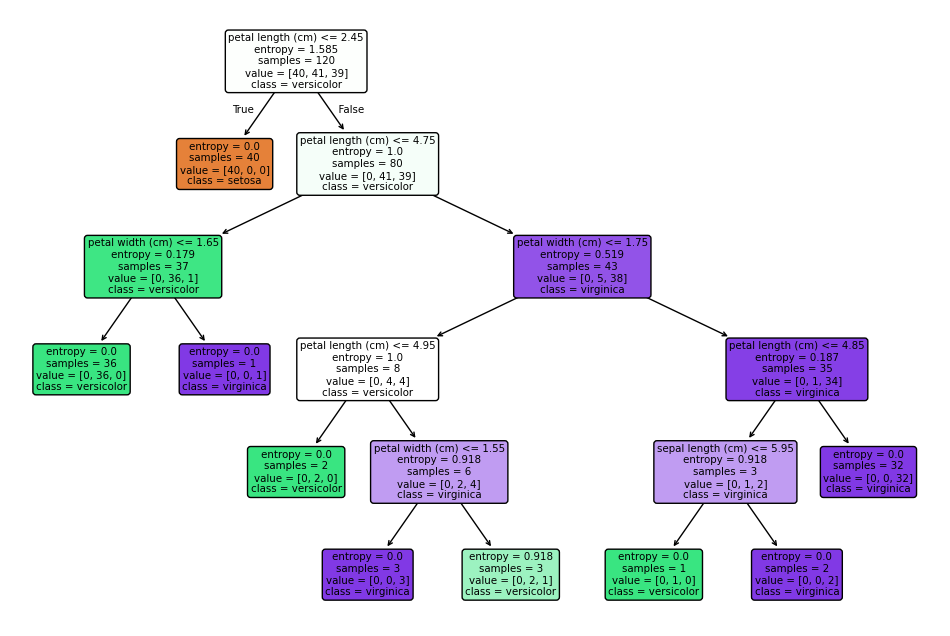

In [9]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# 2. Random Forests

## Bagging (Bootstrap Aggregating)

Bagging is a smart way for machines to team up and make better predictions.

1. **Bootstrap Sampling:** Imagine we have a lot of candies in a bag. We randomly pick candies (with replacement) to create different candy groups.

2. **Model Training:** Each candy group gets its own smart friend (model) to learn from them. They become experts in predicting things based on their candy group.

3. **Combining Predictions:** Now, when we need to make a decision, each smart friend (model) gives their opinion. For decisions like "Is it a cat or a dog?" they might vote. For other decisions, like "How heavy is this bag?" they might average their guesses.

The cool thing is, because they learned from different candy groups, together they make better decisions than just one smart friend alone. It's like teamwork for better predictions!


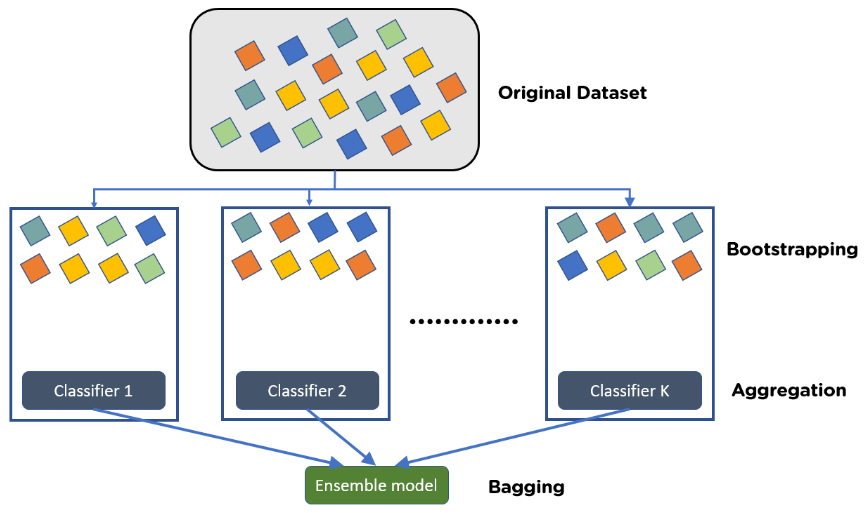

Random Forest is an ensemble learning method that builds multiple decision trees and merges their predictions. Let's create a simple Random Forest demo using scikit-learn with the same Iris dataset.

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Create a Random Forest Classifier
# Hyperparameters to consider:
# - n_estimators: The number of trees in the forest.
# - max_depth: Maximum depth of the trees in the forest.
# - min_samples_split: The minimum number of samples required to split an internal node.
# - min_samples_leaf: The minimum number of samples required to be at a leaf node.
# - criterion: The function to measure the quality of a split. 'gini' for Gini impurity or 'entropy' for information gain.

# You can experiment with different hyperparameter values to see how they affect the model.
# Here's an example with some values:
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion='gini', random_state=42)

- n_estimators: The number of trees in the forest. A higher number usually leads to better performance but increases computation time.

In [12]:
# Fit the model to the training data
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [13]:
# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


# Let's try it on the weather dataset

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/weather.csv")
df

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [ ]:
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Temp'] = label_encoder.fit_transform(df['Temp'])
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])
df['Windy'] = label_encoder.fit_transform(df['Windy'])
df['Play'] = label_encoder.fit_transform(df['Play'])

df

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [ ]:
# Split the data into features and target variable
X = df.drop('Play', axis=1)
y = df['Play']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions on the test set
dt_predictions = dt_classifier.predict(X_test)

In [ ]:
# Evaluate models
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree:
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



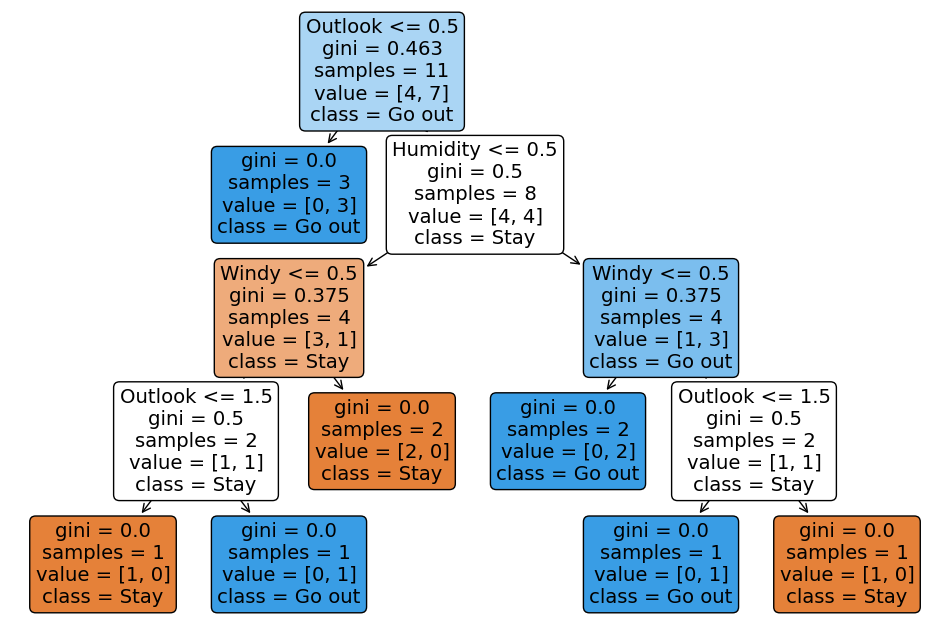

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=df.columns.tolist(), class_names=["Stay", "Go out"], filled=True, rounded=True)
plt.show()

In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
# Evaluate models
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree:
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
# Evaluate models
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest:
Accuracy: 0.3333333333333333
Confusion Matrix:
 [[0 1]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



# Let's try on titanic too

In [16]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
# Convertir la variable 'Sex' (Male = 0, Female = 1)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])


In [19]:
# Convertir la variable 'Embarked' en variables binaires
df = pd.get_dummies(df, columns=['Embarked'])

# Vérifier les premières lignes après conversion
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN       False       False        True  
1          PC 17599  71.2833   C85        True       False       False  
2  STON/O2. 3101282   7.9250   NaN       False       False        True  
3   

In [20]:
# Remplir les valeurs manquantes de 'Age' avec la médiane
df['Age'].fillna(df['Age'].median(), inplace=True)


<ipython-input-20-2483efd06729>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [23]:
print (df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN       False       False        True  
1          PC 17599  71.2833   C85        True       False       False  
2  STON/O2. 3101282   7.9250   NaN       False       False        True  
3   

In [25]:
# Séparer les caractéristiques (features) et la cible (target)
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])  # Suppression des colonnes inutiles
y = df['Survived']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Predictions on the test set
dt_predictions = dt_classifier.predict(X_test)

In [29]:
# Evaluate models
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree:
Accuracy: 0.7486033519553073
Confusion Matrix:
 [[83 22]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       105
           1       0.70      0.69      0.69        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



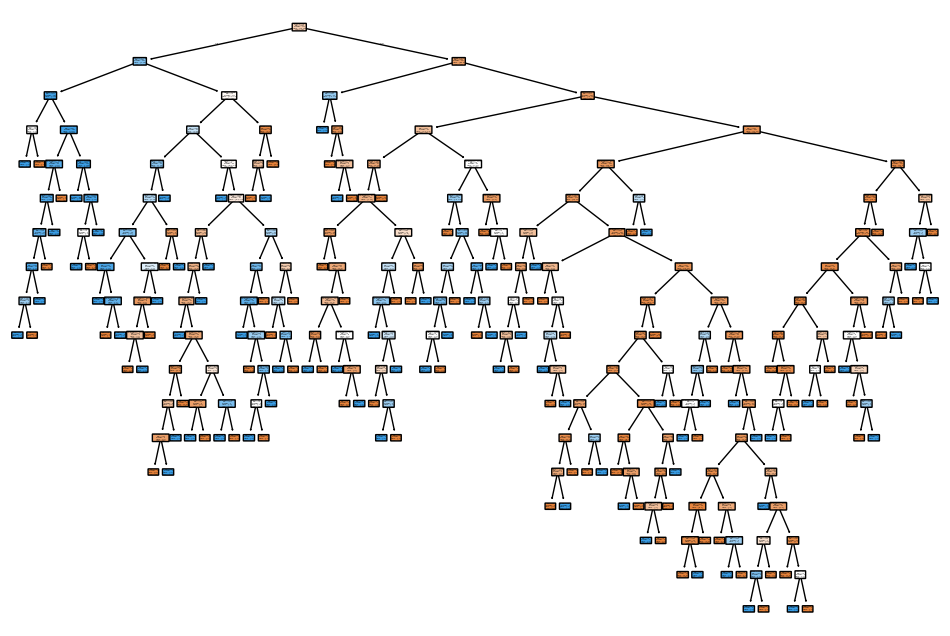

In [30]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=df.columns.tolist(), class_names=["Stay", "Go out"], filled=True, rounded=True)
plt.show()

In [31]:
# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

In [33]:
# Evaluate models
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree:
Accuracy: 0.7486033519553073
Confusion Matrix:
 [[83 22]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       105
           1       0.70      0.69      0.69        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



In [34]:
# Evaluate models
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest:
Accuracy: 0.8212290502793296
Confusion Matrix:
 [[90 15]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

